In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import *

import selenium
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException

%matplotlib inline

In [2]:
# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format='retina'

In [3]:
df = pd.read_csv('dataset_hw1.csv')
df.head()

,movie_ID,title,genre,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers
0,19820019,만추,멜로/로맨스,113.0,7.31,5175,8692,한국,15세이상관람가,씨제이엔터테인먼트,2011,2,844103
1,20050082,이터널 선샤인,멜로/로맨스,107.0,9.11,9388,812,미국,15세이상관람가,코리아픽쳐스(주),2005,11,506609
2,20061214,작은 연못,드라마,86.0,6.51,873,393,한국,15세이상관람가,NaN,2010,4,47160
3,20061223,소년은 울지 않는다,액션,98.0,5.62,266,352,한국,15세이상관람가,㈜스튜디오이쩜영,2008,11,94993
4,20068576,그날의 분위기,멜로/로맨스,103.0,6.53,3005,2953,한국,15세이상관람가,(주)쇼박스,2016,1,652453


## 추가 데이터 수집

In [4]:
'''
director = []
director_not_found = []

driver = webdriver.Chrome()
for i in df.title:
    try:
        driver.get(f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query={i}감독')
        element = driver.find_element_by_xpath('//*[@id="mflick"]/div/div/ul/li/div/div/strong/a').text
        director.append([i, element])
    except NoSuchElementException as e:
        print('감독을 찾지 못한 영화:',i)
        director_not_found.append(i)
        continue
driver.quit()
'''

'\ndirector = []\ndirector_not_found = []\n\ndriver = webdriver.Chrome()\nfor i in df.title:\n    try:\n        driver.get(f\'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query={i}감독\')\n        element = driver.find_element_by_xpath(\'//*[@id="mflick"]/div/div/ul/li/div/div/strong/a\').text\n        director.append([i, element])\n    except NoSuchElementException as e:\n        print(\'감독을 찾지 못한 영화:\',i)\n        director_not_found.append(i)\n        continue\ndriver.quit()\n'

In [5]:
# xpath가 달라 찾지 못한 영화감독 다른 xpath로 재시도

'''
director_not_found_2 = []

driver = webdriver.Chrome()
for i in director_not_found:
    try:
        driver.get(f'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=영화 {i}감독')
        element = driver.find_element_by_xpath('//*[@id="mflick"]/div/div/ul/li/div/div[2]/strong/span').text
        director.append([i, element])
    except NoSuchElementException as e:
        print('감독을 찾지 못한 영화:',i)
        director_not_found_2.append(i)
        continue
driver.quit()
'''

'\ndirector_not_found_2 = []\n\ndriver = webdriver.Chrome()\nfor i in director_not_found:\n    try:\n        driver.get(f\'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=영화 {i}감독\')\n        element = driver.find_element_by_xpath(\'//*[@id="mflick"]/div/div/ul/li/div/div[2]/strong/span\').text\n        director.append([i, element])\n    except NoSuchElementException as e:\n        print(\'감독을 찾지 못한 영화:\',i)\n        director_not_found_2.append(i)\n        continue\ndriver.quit()\n'

In [6]:
# dataframe merge를 위해 column이름 통일

'''
df_director = pd.DataFrame(director)
df_director = df_director.rename(columns = {0:'title', 1:'director'})
df_director
'''

"\ndf_director = pd.DataFrame(director)\ndf_director = df_director.rename(columns = {0:'title', 1:'director'})\ndf_director\n"

In [7]:
'''
df_merge = pd.merge(df, df_director, on='title', how='outer')
df_merge
'''

"\ndf_merge = pd.merge(df, df_director, on='title', how='outer')\ndf_merge\n"

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_ID         1411 non-null   int64  
 1   title            1411 non-null   object 
 2   genre            1408 non-null   object 
 3   running_time     1409 non-null   float64
 4   netizen_ratings  1411 non-null   float64
 5   num_reviews      1411 non-null   int64  
 6   num_article      1411 non-null   int64  
 7   country          1409 non-null   object 
 8   rating           1410 non-null   object 
 9   companyNm        1406 non-null   object 
 10  released_year    1411 non-null   int64  
 11  released_month   1411 non-null   int64  
 12  num_viewers      1411 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.4+ KB


In [9]:
df.describe()

,movie_ID,running_time,netizen_ratings,num_reviews,num_article,released_year,released_month,num_viewers
count,1.411000e+03,1409.000000,1411.000000,1411.000000,1411.000000,1411.000000,1411.000000,1.411000e+03
mean,2.012593e+07,110.545067,7.618731,4582.657690,1031.433026,2012.635719,6.406804,1.074520e+06
std,3.060055e+04,18.083797,1.111924,7316.325767,1866.725542,2.899102,3.465790,1.841526e+06
min,1.982002e+07,0.000000,2.530000,49.000000,0.000000,2005.000000,1.000000,2.260000e+04
25%,2.010038e+07,98.000000,7.010000,943.500000,38.000000,2010.000000,3.000000,1.079420e+05
50%,2.012641e+07,110.000000,7.800000,2175.000000,194.000000,2013.000000,7.000000,3.558510e+05
75%,2.015077e+07,121.000000,8.420000,5048.000000,1279.500000,2015.000000,9.000000,1.179833e+06
max,2.018766e+07,235.000000,9.380000,95111.000000,19996.000000,2018.000000,12.000000,1.761368e+07


In [10]:
# 결측치 제거

df_dropped = df.dropna()
df_dropped[df_dropped.isnull().any(axis=1)]

,movie_ID,title,genre,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers


In [46]:
# 사용하지 않을 feature 제거
# movie_ID, title은 사용하지 않음

df_dropped = df_dropped.drop(['movie_ID', 'title'], axis=1)
df_dropped.head()

KeyError: "['movie_ID' 'title'] not found in axis"

In [47]:
df_dropped

,genre,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers
0,멜로/로맨스,113.0,7.31,5175,8692,한국,15세이상관람가,씨제이엔터테인먼트,2011,2,844103
1,멜로/로맨스,107.0,9.11,9388,812,미국,15세이상관람가,기타,2005,11,506609
3,액션,98.0,5.62,266,352,한국,15세이상관람가,기타,2008,11,94993
4,멜로/로맨스,103.0,6.53,3005,2953,한국,15세이상관람가,(주)쇼박스,2016,1,652453
5,SF,120.0,4.80,3888,1263,한국,15세이상관람가,기타,2012,4,97916
...,...,...,...,...,...,...,...,...,...,...,...
1406,액션,114.0,7.89,1408,645,미국,청소년관람불가,씨네그루(주)키다리이엔티,2017,8,155368
1407,액션,124.0,7.18,1079,60,미국,12세이상관람가,(주)넥스트엔터테인먼트월드(NEW),2017,4,72495
1408,액션,139.0,7.92,9816,930,미국,12세이상관람가,이십세기폭스코리아(주),2017,8,2051315
1409,애니메이션,94.0,9.19,5304,81,영국,15세이상관람가,판씨네마(주),2017,11,409345


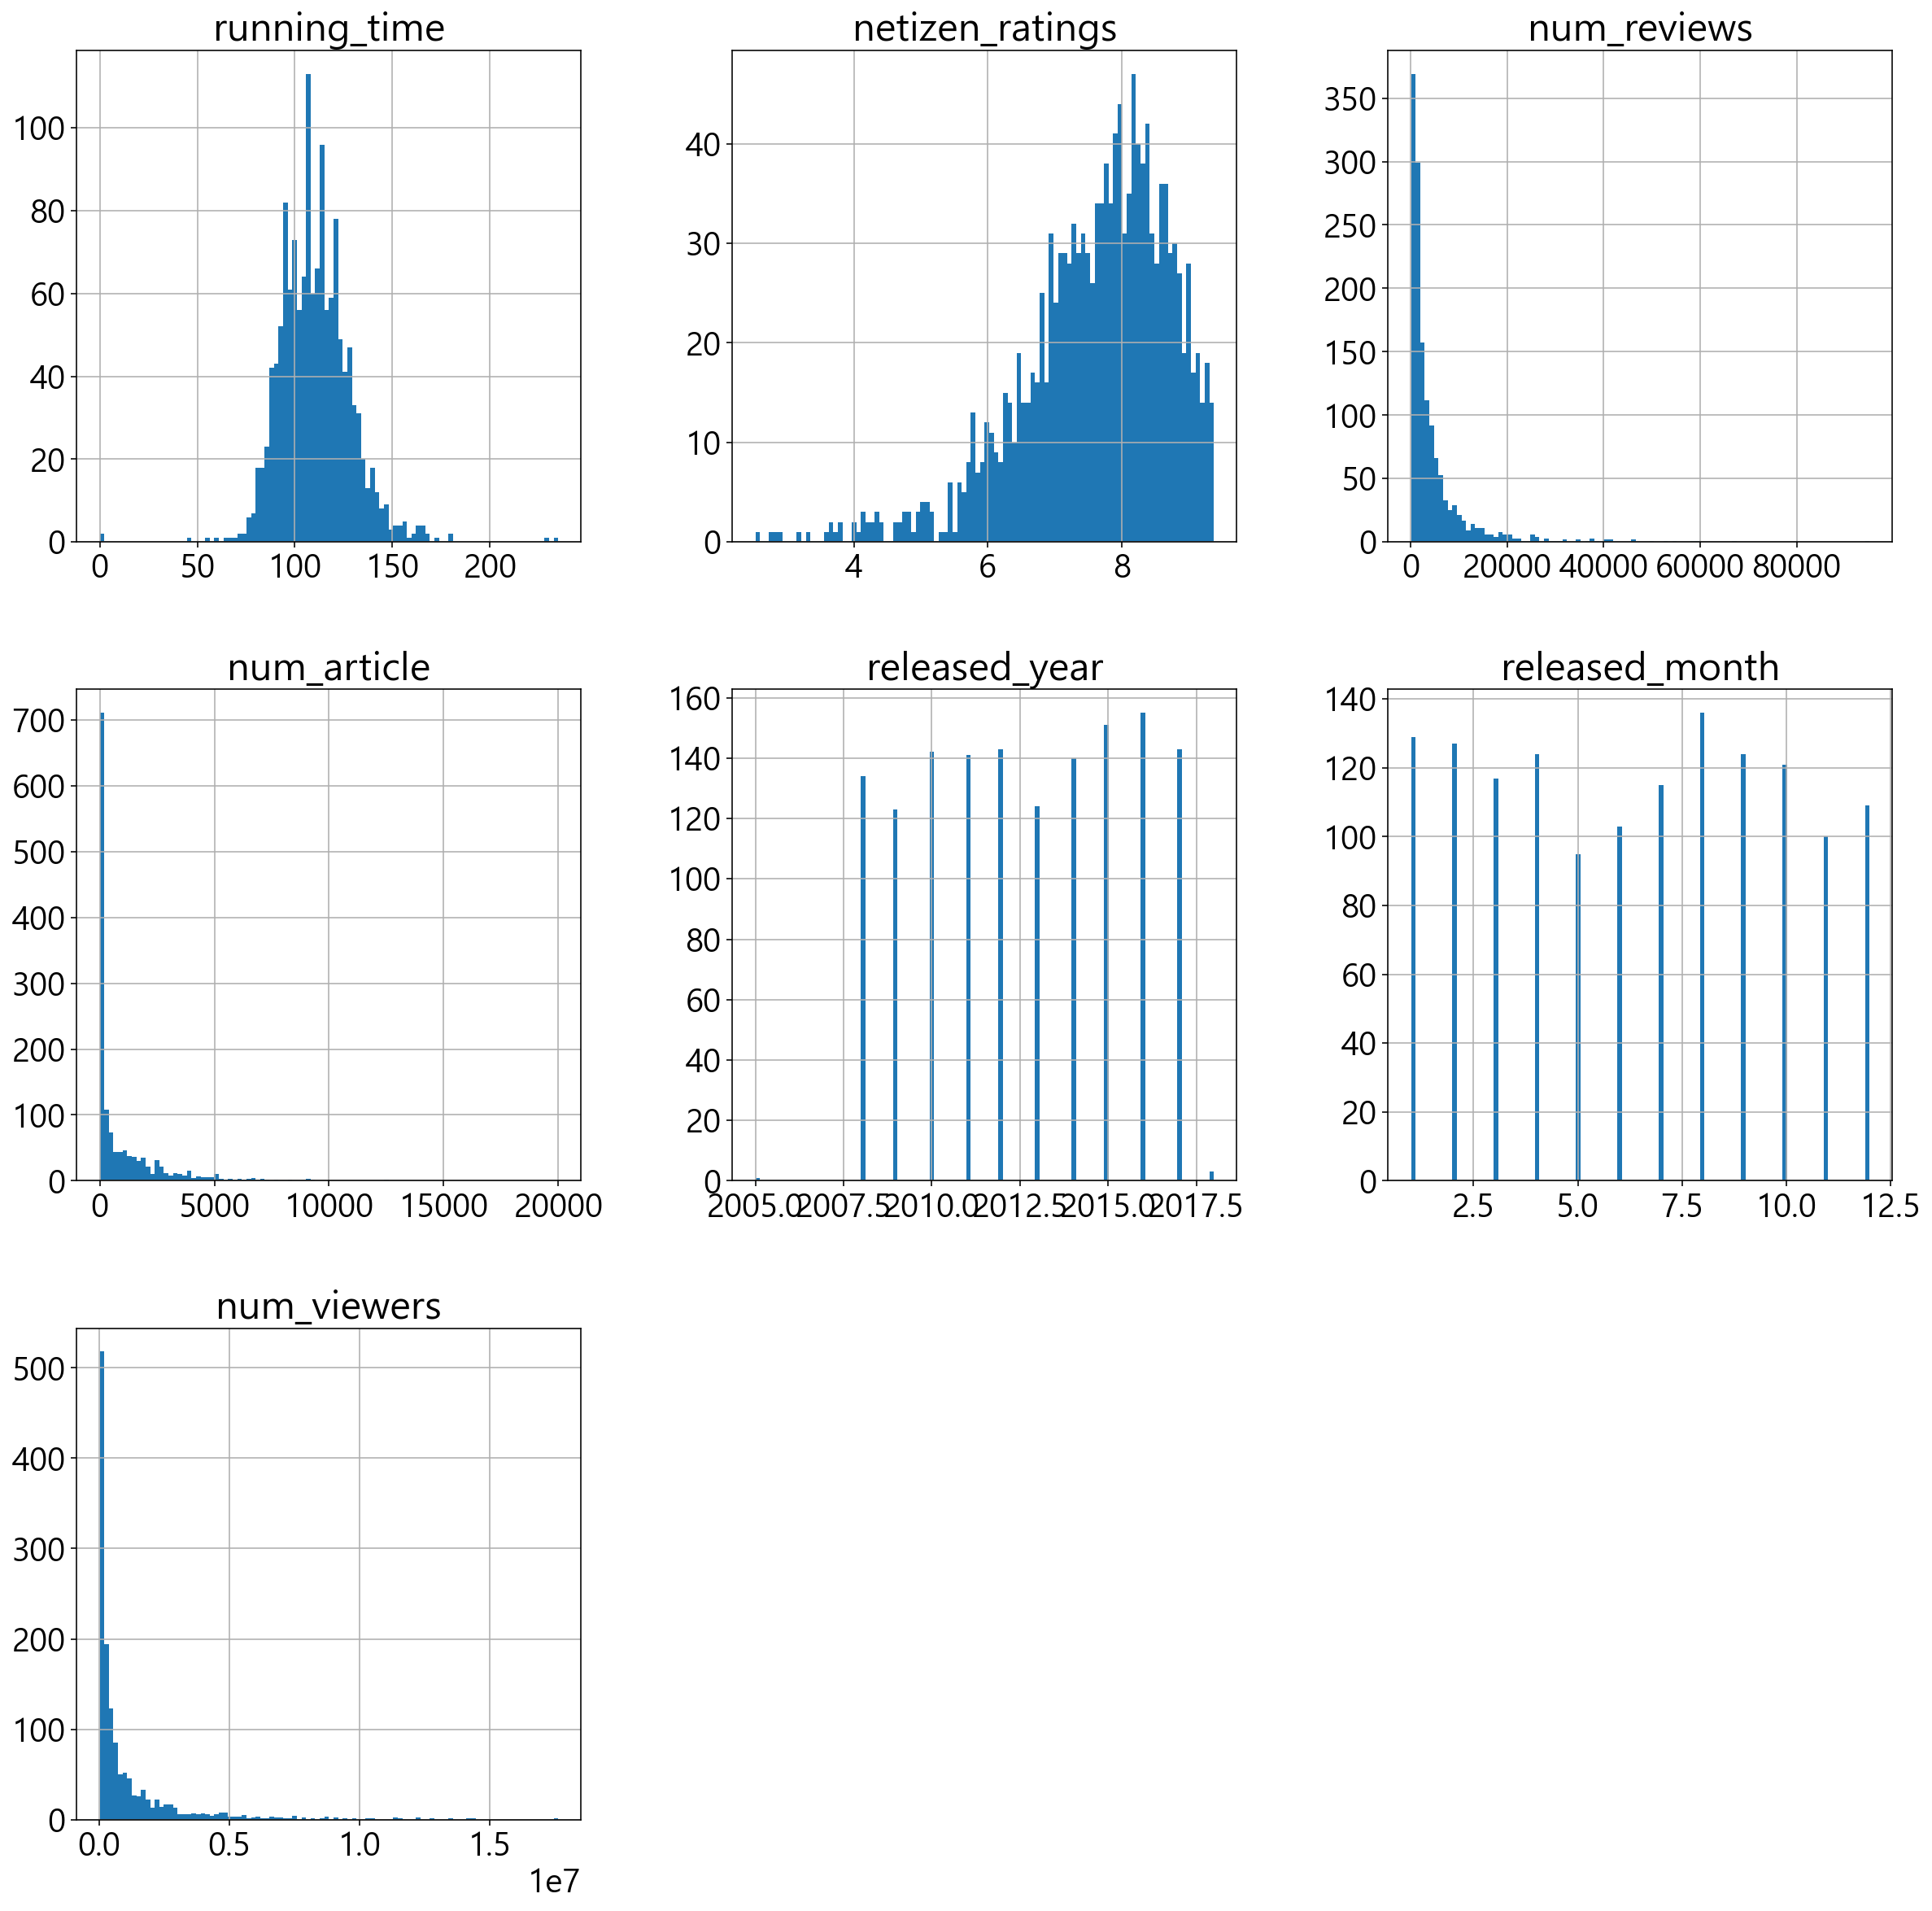

In [49]:
df_dropped.hist(bins=100, figsize=(20, 20))
plt.rc('font', size=15)
plt.show()

array([[<AxesSubplot:xlabel='running_time', ylabel='running_time'>,
        <AxesSubplot:xlabel='netizen_ratings', ylabel='running_time'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='running_time'>,
        <AxesSubplot:xlabel='num_article', ylabel='running_time'>,
        <AxesSubplot:xlabel='num_viewers', ylabel='running_time'>],
       [<AxesSubplot:xlabel='running_time', ylabel='netizen_ratings'>,
        <AxesSubplot:xlabel='netizen_ratings', ylabel='netizen_ratings'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='netizen_ratings'>,
        <AxesSubplot:xlabel='num_article', ylabel='netizen_ratings'>,
        <AxesSubplot:xlabel='num_viewers', ylabel='netizen_ratings'>],
       [<AxesSubplot:xlabel='running_time', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='netizen_ratings', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='num_reviews', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='num_article', ylabel='num_reviews'>,
        <AxesSubplot:xlabel='num_v

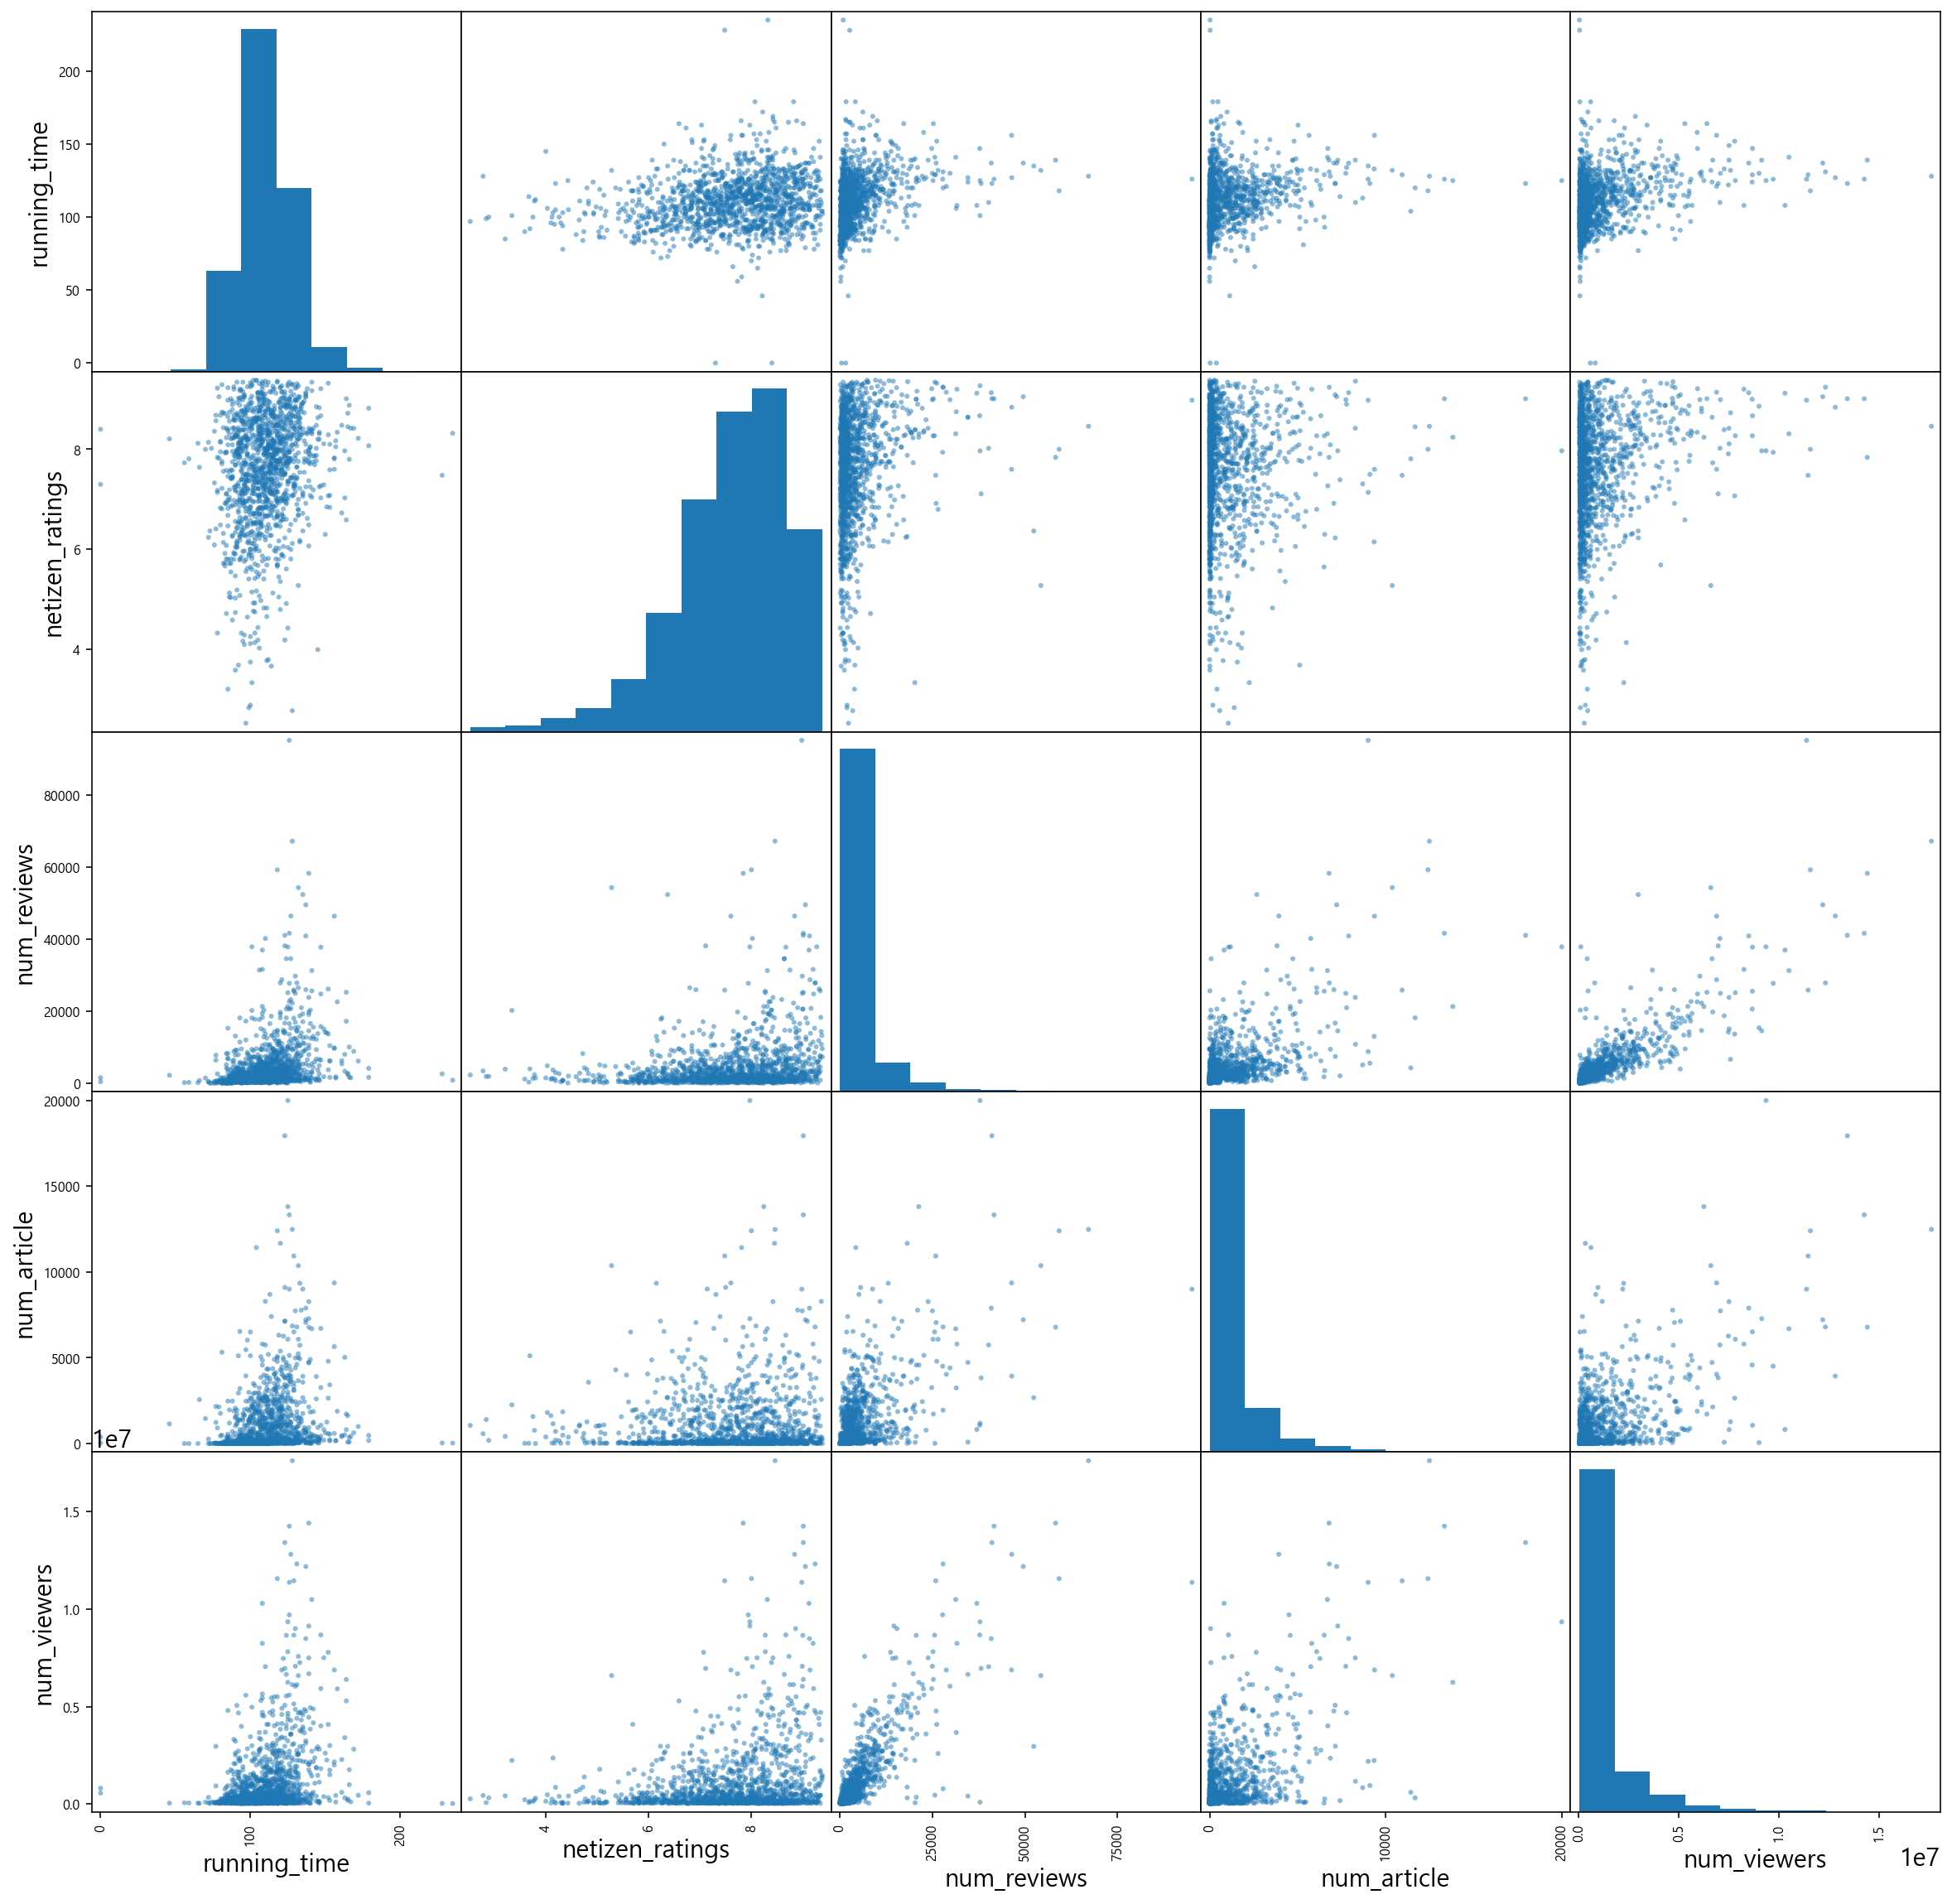

In [13]:
from pandas.plotting import scatter_matrix

cols = ['running_time', 'netizen_ratings', 'num_reviews', 'num_article', 'num_viewers']
plt.rc('font', size=15)
scatter_matrix(df_dropped[cols], figsize=(20,20))

## categorical data 처리

In [14]:
df_dropped.genre.value_counts()

드라마         303
액션          267
애니메이션       171
코미디         136
멜로/로맨스       92
범죄           69
공포(호러)       69
스릴러          62
SF           58
미스터리         35
어드벤처         31
사극           31
판타지          28
다큐멘터리        22
가족           14
전쟁            7
뮤지컬           3
서부극(웨스턴)      2
Name: genre, dtype: int64

In [15]:
df_dropped.country.value_counts()

미국          669
한국          478
일본           72
영국           45
프랑스          39
중국           23
홍콩           11
스페인          11
독일           11
벨기에           7
캐나다           5
인도            5
이탈리아          4
호주            4
덴마크           2
뉴질랜드          2
남아프리카공화국      2
스웨덴           2
대만            2
멕시코           1
오스트리아         1
아일랜드          1
러시아           1
아이슬란드         1
페루            1
Name: country, dtype: int64

In [16]:
df_dropped.rating.value_counts()

15세이상관람가    535
12세이상관람가    361
청소년관람불가     267
전체관람가       237
Name: rating, dtype: int64

In [17]:
df_dropped.companyNm.value_counts()

롯데쇼핑㈜롯데엔터테인먼트          162
씨제이이앤엠(주)              124
유니버설픽쳐스인터내셔널 코리아(유)    100
워너브러더스 코리아(주)           87
이십세기폭스코리아(주)            85
                      ... 
(주)스튜디오이쩜영               1
(주)오에이엘                  1
커넥트픽쳐스(주)                1
GV 엔터테인먼트                1
(주)레드로버                  1
Name: companyNm, Length: 128, dtype: int64

In [18]:
# df_dropped.director.value_counts()

In [19]:
df_dropped.released_year.value_counts()

2016    155
2015    151
2017    143
2012    143
2010    142
2011    141
2014    140
2008    134
2013    124
2009    123
2018      3
2005      1
Name: released_year, dtype: int64

In [20]:
df_dropped.released_month.value_counts()

8     136
1     129
2     127
9     124
4     124
10    121
3     117
7     115
12    109
6     103
11    100
5      95
Name: released_month, dtype: int64

companyNm의 경우 category가 많기 때문에 상위 30개 배급사를 제외하고 모두 기타로 간주함

In [21]:
# 상위 30개 배급사

top30 = df_dropped.companyNm.value_counts().nlargest(30).index
top30

Index(['롯데쇼핑㈜롯데엔터테인먼트', '씨제이이앤엠(주)', '유니버설픽쳐스인터내셔널 코리아(유)', '워너브러더스 코리아(주)',
       '이십세기폭스코리아(주)', '(주)넥스트엔터테인먼트월드(NEW)', '(주)쇼박스', '씨제이엔터테인먼트',
       '한국소니픽쳐스릴리징브에나비스타영화㈜', '(주)싸이더스', '(주)시너지하우스 (시너지)',
       '소니픽쳐스릴리징월트디즈니스튜디오스코리아(주)', '메가박스중앙(주)플러스엠', 'CGV아트하우스', '에스케이텔레콤(주)',
       '(주)영화사 빅', '월트디즈니컴퍼니코리아(주)', '(주)이수C&E', '판씨네마(주)', '(주)나이너스엔터테인먼트',
       '(주)화앤담이엔티', '씨너스엔터테인먼트(주)', '씨네그루(주)다우기술', '(주)시네마서비스',
       '씨네그루(주)키다리이엔티', '(주)팝엔터테인먼트', '(주)리틀빅픽쳐스', '㈜케이디미디어', '필라멘트픽쳐스',
       '(주)박수엔터테인먼트'],
      dtype='object')

In [22]:
# 차집합을 이용해 30개 배급사를 제외한 기타 배급사 index list 추출

other_index = list(set(df_dropped.companyNm.value_counts().index) - set(top30))
other_index

['그린나래미디어(주)',
 '에이원엔터테인먼트',
 '(주)스마일이엔티',
 '주식회사 디에스이이디',
 '(주)대명문화공장',
 '(주)태원엔터테인먼트',
 '(주)영화사오원',
 '(주)와이즈베이',
 '(주)새인컴퍼니',
 '(주)페퍼민트앤컴퍼니',
 '실버스푼',
 'THE 픽쳐스',
 '(주)영화제작전원사 ',
 '투니버스(주)온미디어',
 '(주)스톰픽쳐스코리아',
 '(주)스폰지이엔티',
 '(주)엣나인필름',
 '(주)크리픽쳐스',
 '(주)미디어데이',
 '(주)누리픽쳐스',
 '(주)팝파트너스',
 '(주)애니플러스',
 '(주)성원아이컴',
 '(주)티캐스트콘텐츠허브',
 '토이 엔터테인먼트',
 '미디어소프트',
 '(주)화천공사',
 '아이비젼엔터테인먼트(주)',
 '(주)유레카픽쳐스 ',
 '(주)인벤트스톤',
 '㈜코리아스크린',
 '(주)스튜디오이쩜영',
 '커넥트픽쳐스(주)',
 '팝엔터테인먼트',
 '주식회사 키위컴퍼니',
 '(유)씨에이치엔터테인먼트',
 '(주)시네마달',
 '(주)비엠컬쳐스',
 '(주)엠플러스픽쳐스',
 '(주)필름더데이즈',
 '씨제이 씨지브이(CJ CGV)(주)',
 '스튜디오 프로그레시브 인큐베이터',
 '(주)더블앤조이픽쳐스',
 '㈜인디스토리',
 '블루미지',
 '(주)에스비에스콘텐츠허브',
 '㈜스튜디오이쩜영',
 '오퍼스픽쳐스',
 '(주)씨지브이신도림',
 '(유)조이앤시네마',
 '(주)미로비젼',
 '㈜영화사 백두대간',
 '아뮤즈코리아(주)',
 '(주)모멘텀엔터테인먼트',
 '(주)마인스 엔터테인먼트',
 '오드',
 '타임스토리그룹(주)',
 '찬란',
 '(주)오에이엘',
 '(주)와우픽쳐스',
 '(주)브리즈픽처스',
 '(주)콘텐츠 난다긴다',
 '월트디즈니컴퍼니코리아 유한책임회사',
 '주식회사 마운틴픽쳐스',
 '(주)유로커뮤니케이션',
 '영화사 풀',
 '대원미디어(주)',
 '(주)영화사 조제',
 'KT&G 상상마당 영화사업팀 컴퍼니에스에스(주)',
 '(주)디스

In [23]:
# data frame에 other_index 적용

df_dropped.replace(other_index, '기타', inplace=True)
df_dropped.head()

,genre,running_time,netizen_ratings,num_reviews,num_article,country,rating,companyNm,released_year,released_month,num_viewers
0,멜로/로맨스,113.0,7.31,5175,8692,한국,15세이상관람가,씨제이엔터테인먼트,2011,2,844103
1,멜로/로맨스,107.0,9.11,9388,812,미국,15세이상관람가,기타,2005,11,506609
3,액션,98.0,5.62,266,352,한국,15세이상관람가,기타,2008,11,94993
4,멜로/로맨스,103.0,6.53,3005,2953,한국,15세이상관람가,(주)쇼박스,2016,1,652453
5,SF,120.0,4.80,3888,1263,한국,15세이상관람가,기타,2012,4,97916


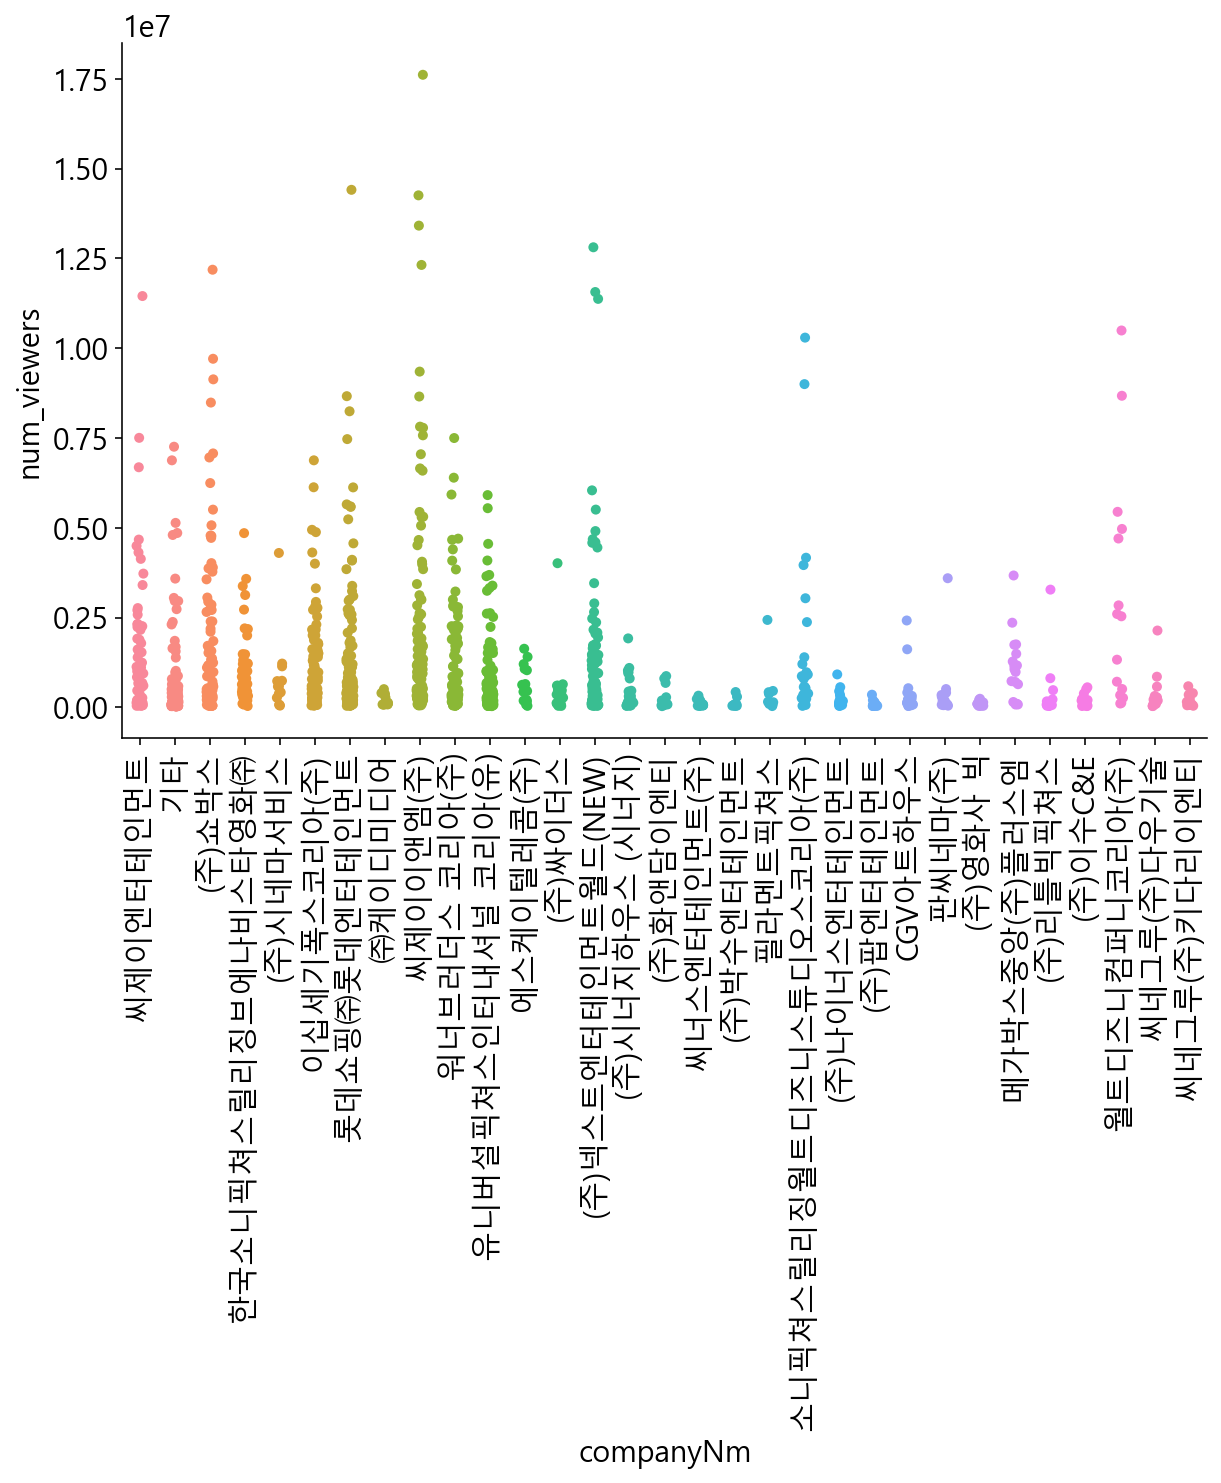

In [24]:
catplot = sns.catplot(x='companyNm', y='num_viewers', data=df_dropped)
catplot.fig.set_size_inches(20,6)
plt.xticks(rotation=90)
plt.rc('font', size=5)
plt.show()

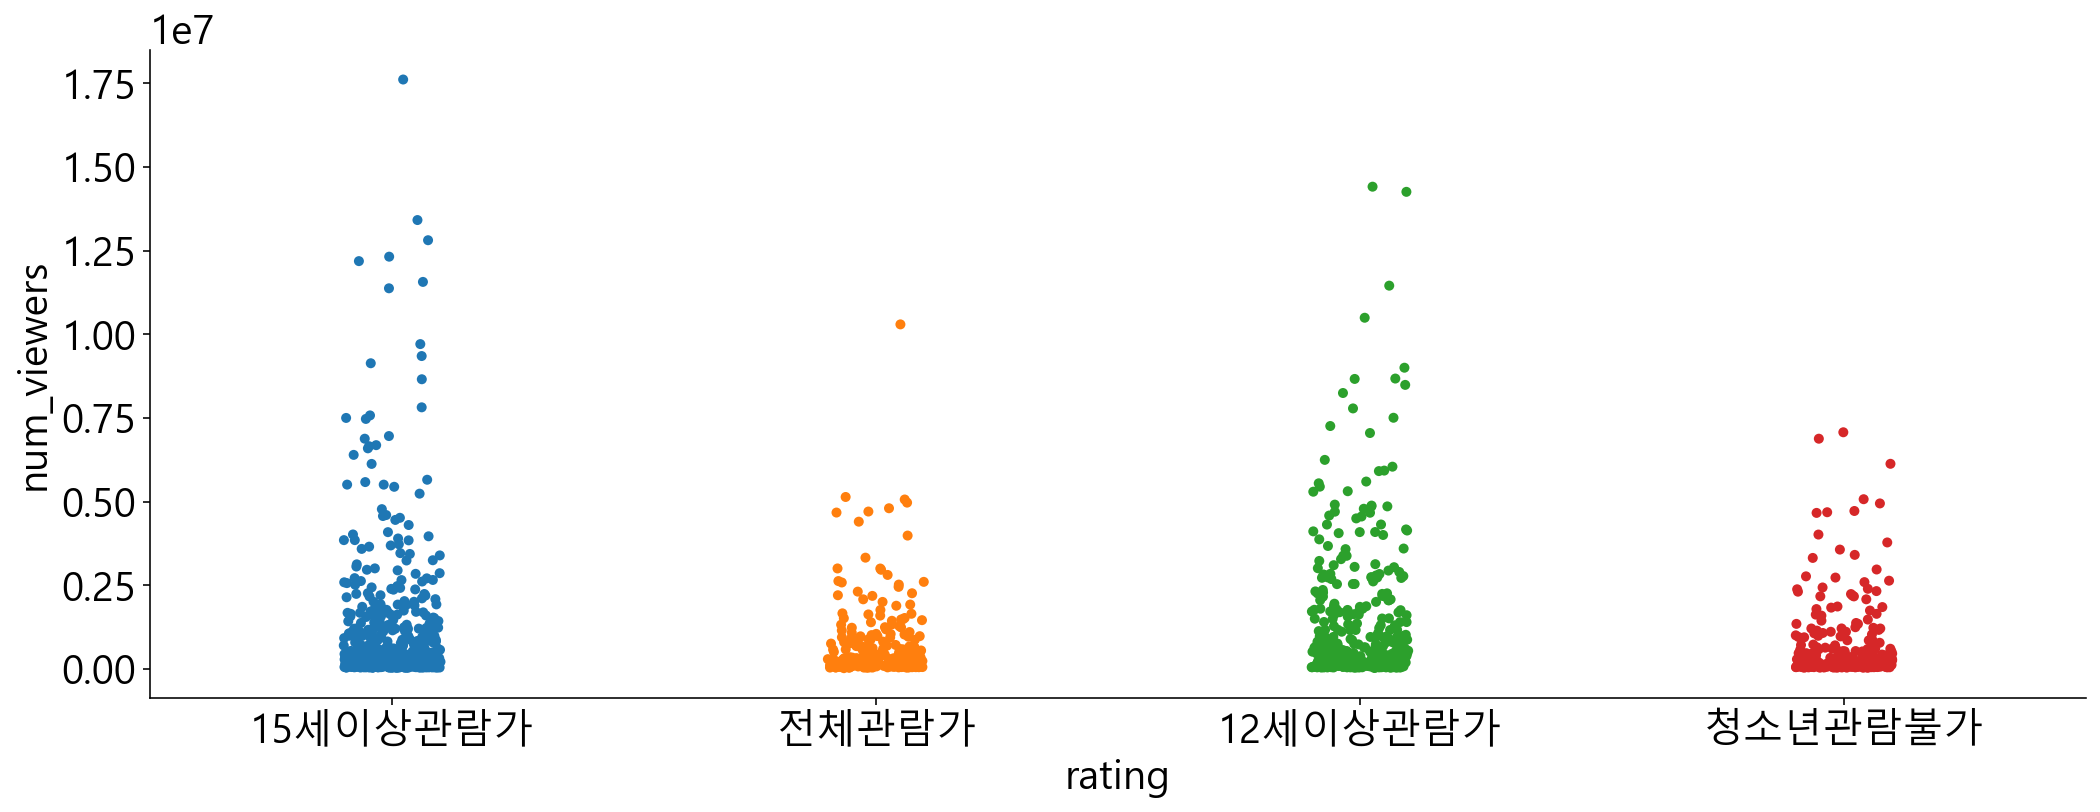

In [57]:
catplot = sns.catplot(x='rating', y='num_viewers', data=df_dropped)
catplot.fig.set_size_inches(20,6)
plt.rc('font', size=20)
plt.show()

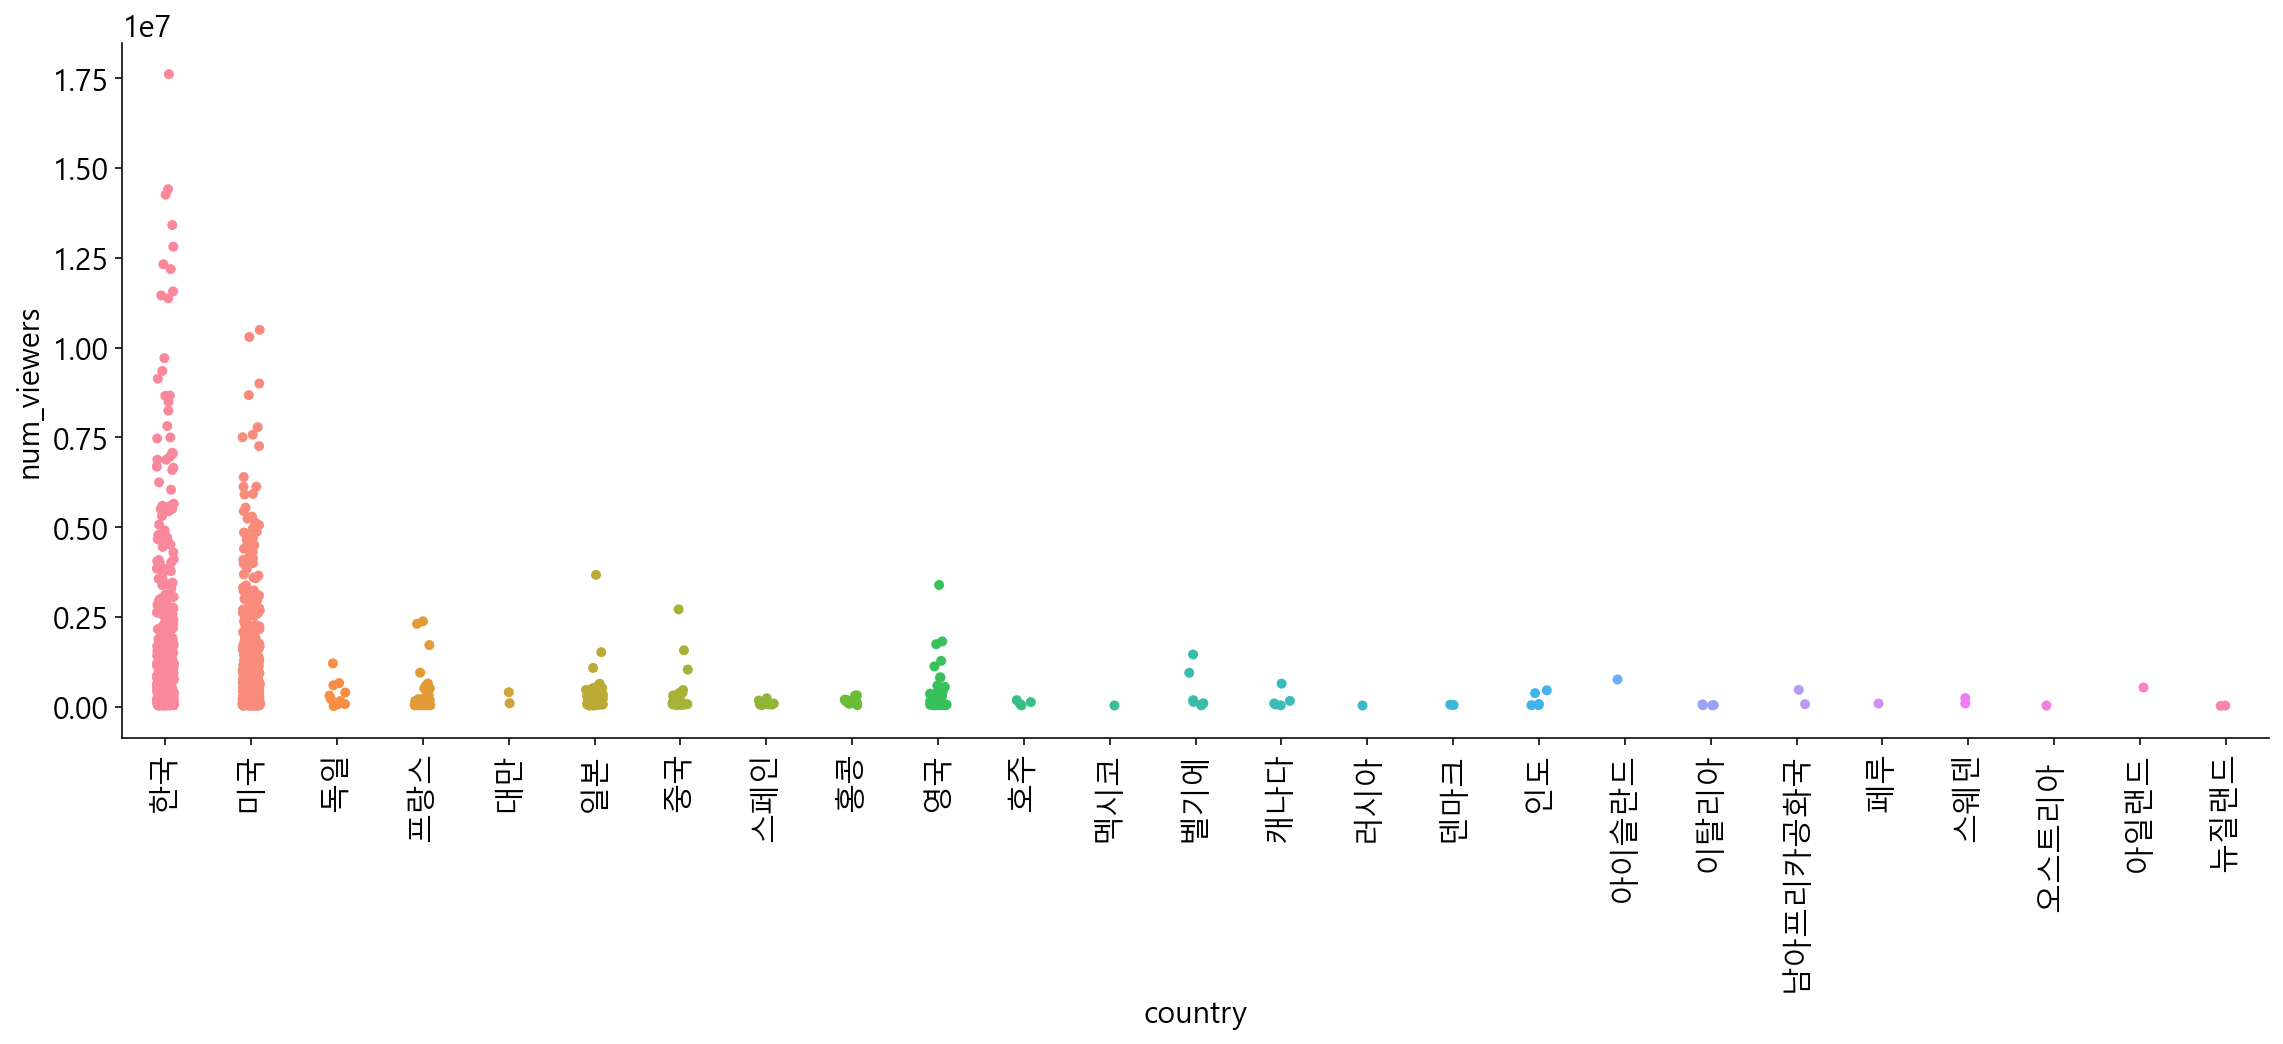

In [26]:
catplot = sns.catplot(x='country', y='num_viewers', data=df_dropped)
catplot.fig.set_size_inches(20,6)
plt.xticks(rotation=90)
plt.rc('font', size=15)
plt.show()

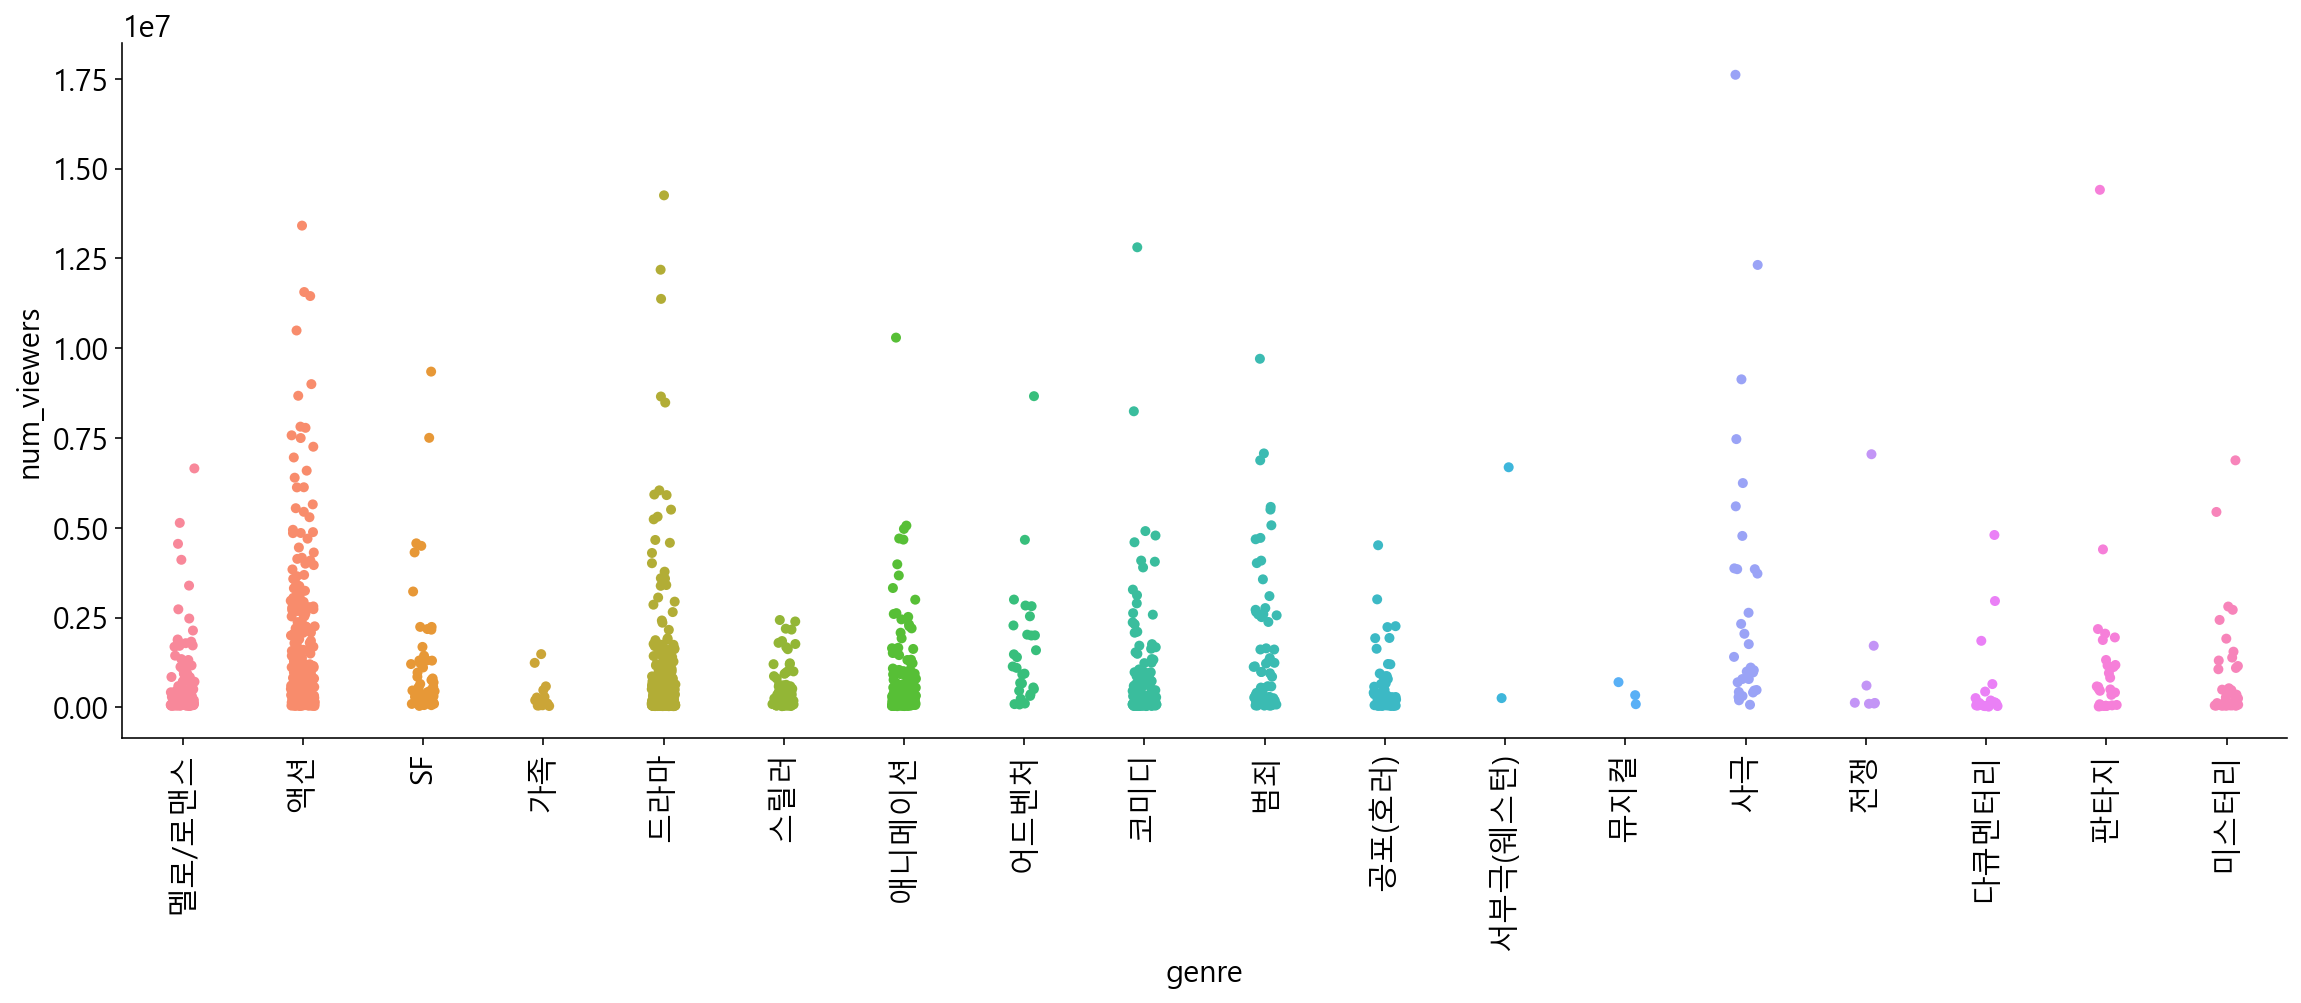

In [27]:
catplot = sns.catplot(x='genre', y='num_viewers', data=df_dropped)
catplot.fig.set_size_inches(20,6)
plt.xticks(rotation=90)
plt.rc('font', size=15)
plt.show()

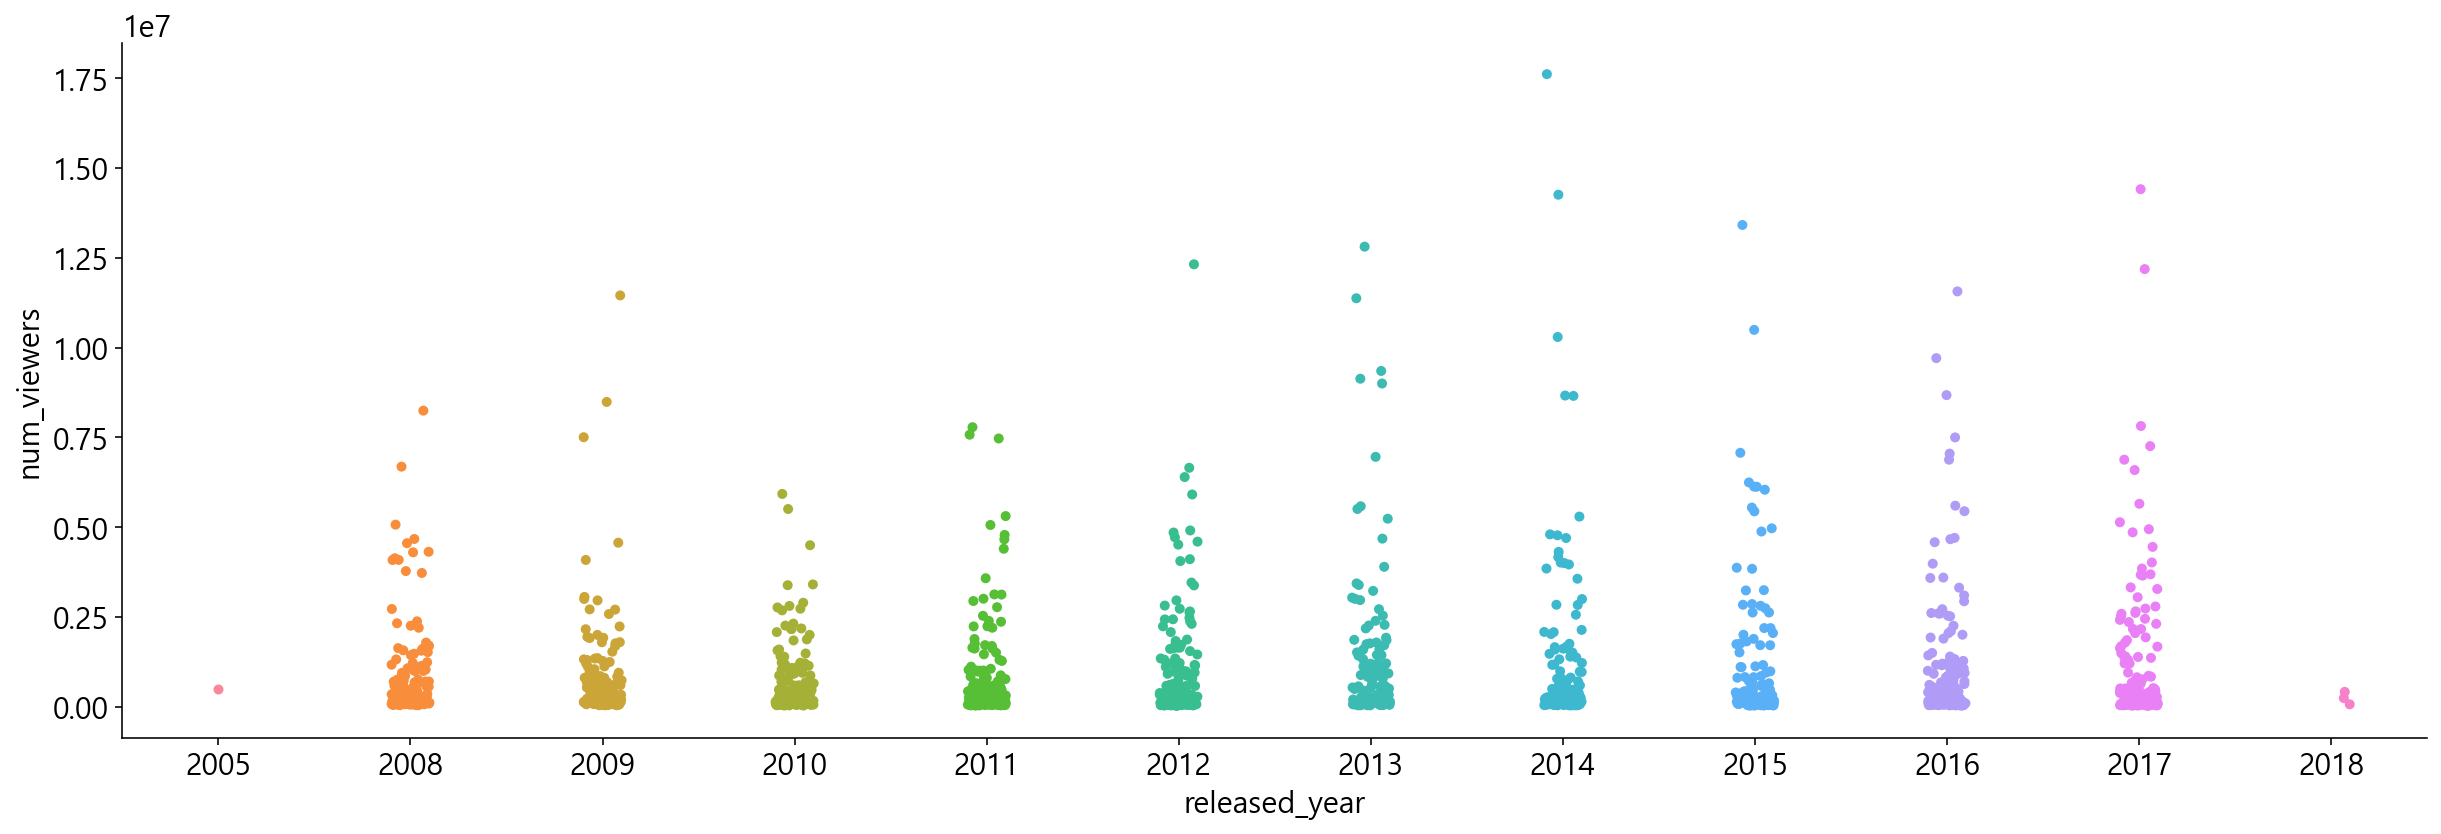

In [54]:
catplot = sns.catplot(x='released_year', y='num_viewers', data=df_dropped)
catplot.fig.set_size_inches(20,6)
plt.rc('font', size=15)
plt.show()

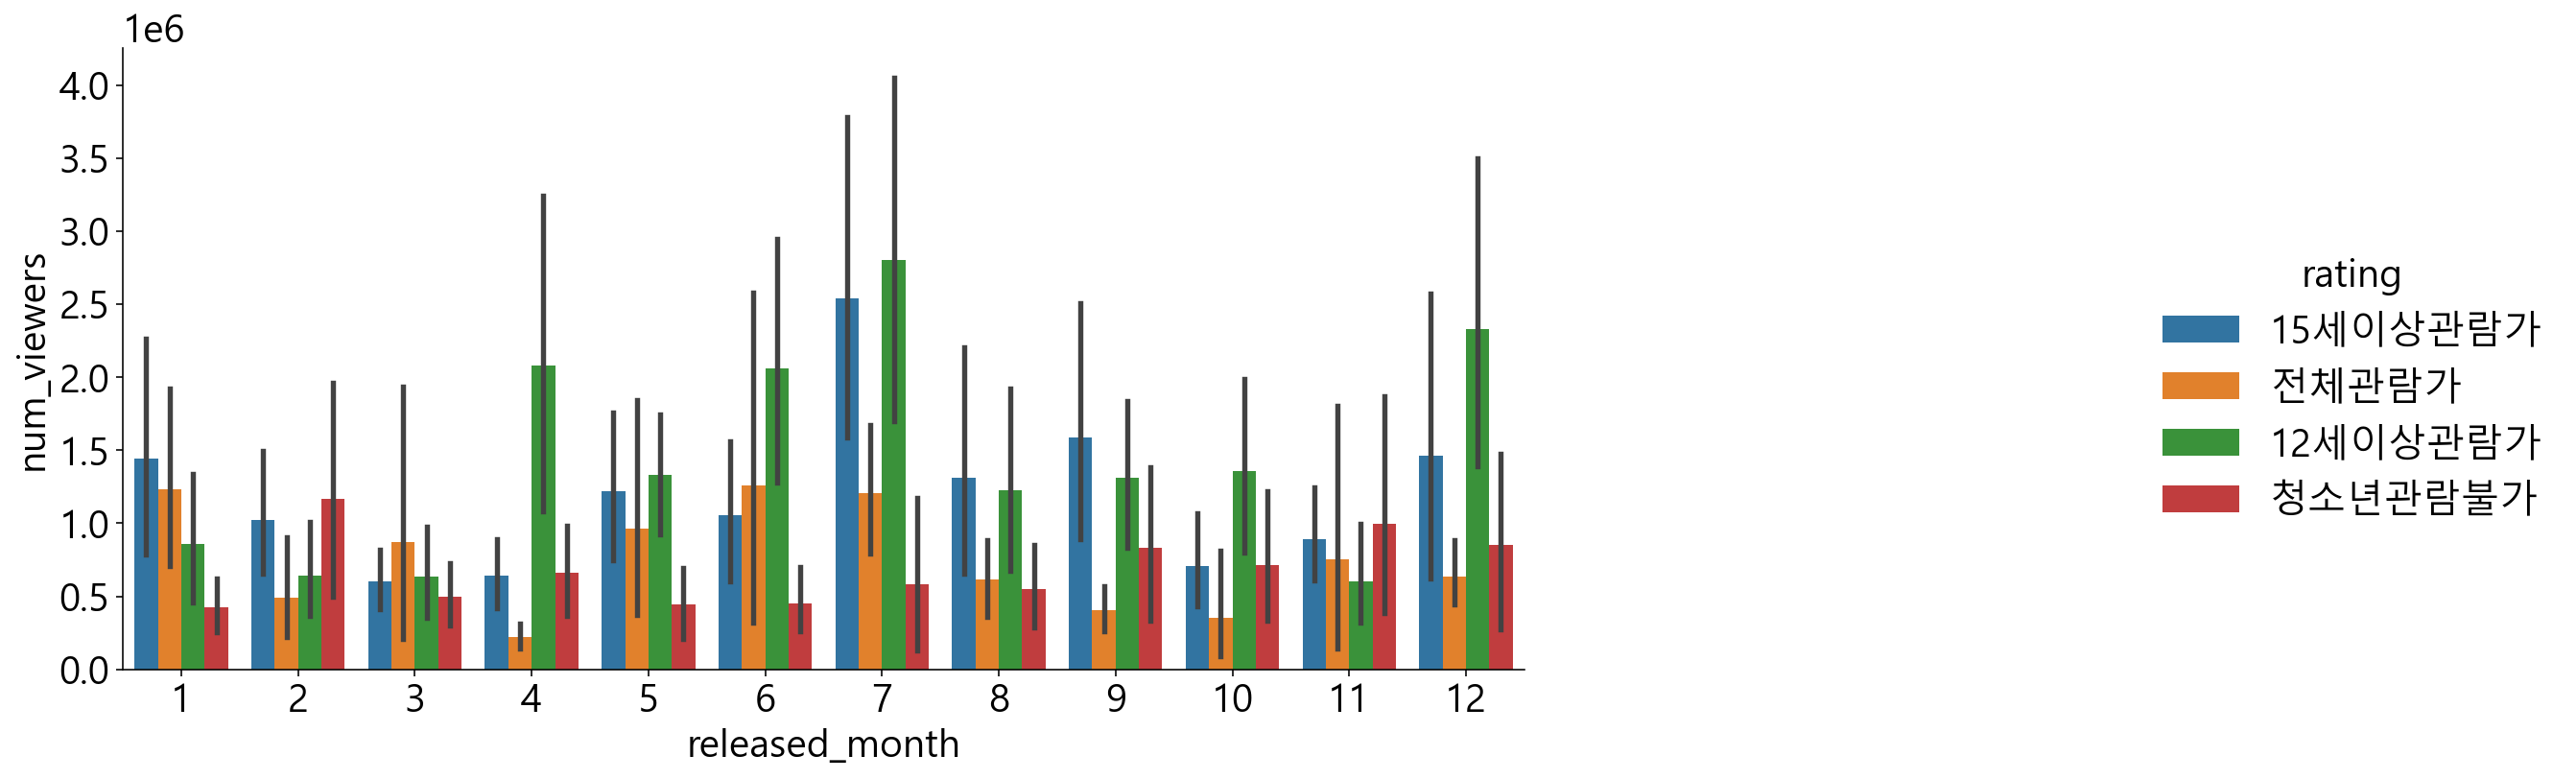

In [53]:
catplot = sns.catplot(x='released_month', y='num_viewers', data=df_dropped, kind='bar', hue='rating')
catplot.fig.set_size_inches(20,6)
plt.rc('font', size=15)
plt.show()

### binary encoding

In [30]:
be = BinaryEncoder(cols=['companyNm', 'genre', 'country', 'rating', 'released_year', 'released_month'], drop_invariant=True)

df_be = be.fit_transform(df_dropped)
df_be

,genre_0,genre_1,genre_2,genre_3,genre_4,running_time,netizen_ratings,num_reviews,num_article,country_0,...,companyNm_4,released_year_0,released_year_1,released_year_2,released_year_3,released_month_0,released_month_1,released_month_2,released_month_3,num_viewers
0,0,0,0,0,1,113.0,7.31,5175,8692,0,...,1,0,0,0,1,0,0,0,1,844103
1,0,0,0,0,1,107.0,9.11,9388,812,0,...,0,0,0,1,0,0,0,1,0,506609
3,0,0,0,1,0,98.0,5.62,266,352,0,...,0,0,0,1,1,0,0,1,0,94993
4,0,0,0,0,1,103.0,6.53,3005,2953,0,...,1,0,1,0,0,0,0,1,1,652453
5,0,0,0,1,1,120.0,4.80,3888,1263,0,...,0,0,1,0,1,0,1,0,0,97916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,0,0,0,1,0,114.0,7.89,1408,645,0,...,1,1,1,0,0,1,0,1,1,155368
1407,0,0,0,1,0,124.0,7.18,1079,60,0,...,0,1,1,0,0,0,1,0,0,72495
1408,0,0,0,1,0,139.0,7.92,9816,930,0,...,0,1,1,0,0,1,0,1,1,2051315
1409,0,0,1,1,1,94.0,9.19,5304,81,0,...,0,1,1,0,0,0,0,1,0,409345


### one-hot encoding

In [31]:
oh = OneHotEncoder(cols=['companyNm', 'genre', 'country', 'rating', 'released_year', 'released_month'], drop_invariant=True)

df_oh = oh.fit_transform(df_dropped)
df_oh

,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10,...,released_month_4,released_month_5,released_month_6,released_month_7,released_month_8,released_month_9,released_month_10,released_month_11,released_month_12,num_viewers
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,844103
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,506609
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94993
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,652453
5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,97916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,155368
1407,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,72495
1408,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2051315
1409,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,409345


## modeling

In [32]:
X_be = df_be.drop(['num_viewers'], axis=1)
X_oh = df_oh.drop(['num_viewers'], axis=1)
y = df_dropped['num_viewers']

### scaling

In [33]:
from sklearn.preprocessing import *

mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

X_min_max = mm_scaler.fit_transform(X_be)
X_min_max = pd.DataFrame(X_min_max)

X_std = std_scaler.fit_transform(X_be)
X_std = pd.DataFrame(X_std)

In [34]:
from sklearn.model_selection import train_test_split

X_train_be, X_test_be, y_train, y_test = train_test_split(X_be, y, test_size=0.2, random_state=42)
X_train_oh, X_test_oh, y_train, y_test = train_test_split(X_oh, y, test_size=0.2, random_state=42)
X_train_mm, X_test_mm, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, random_state=42)
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LinearRegression

model_mm = LinearRegression()
model_std = LinearRegression()
model_be = LinearRegression()
model_oh = LinearRegression()

In [36]:
model_mm.fit(X_train_mm, y_train)
model_std.fit(X_train_std, y_train)
model_be.fit(X_train_be, y_train)
model_oh.fit(X_train_oh, y_train)

y_pred_be = model_be.predict(X_test_be)
y_pred_oh = model_oh.predict(X_test_oh)
y_pred_mm = model_mm.predict(X_test_mm)
y_pred_std = model_std.predict(X_test_std)

# min max, standard scaler의 성능 차이는 없음
print('binary encoding socre:',model_be.score(X_test_be, y_test))
print('one-hot encoding score:',model_oh.score(X_test_oh, y_test))
print('min max score:',model_mm.score(X_test_mm, y_test))
print('standard score:',model_std.score(X_test_std, y_test))

binary encoding socre: 0.7959541275157684
one-hot encoding score: -74817870375.78065
min max score: 0.7959541275157681
standard score: 0.795954127515768


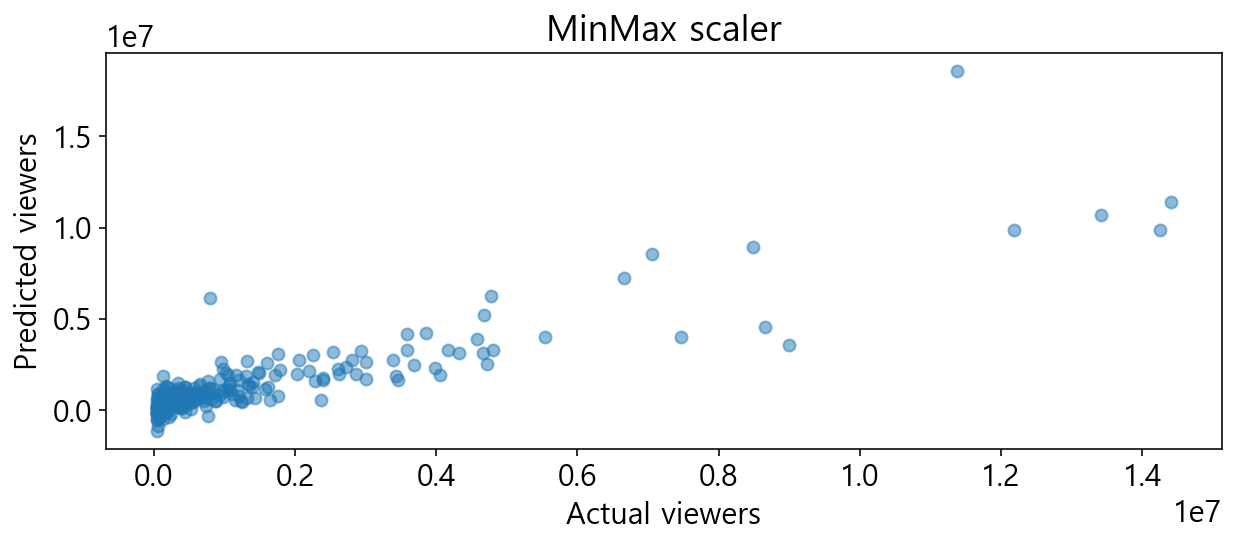

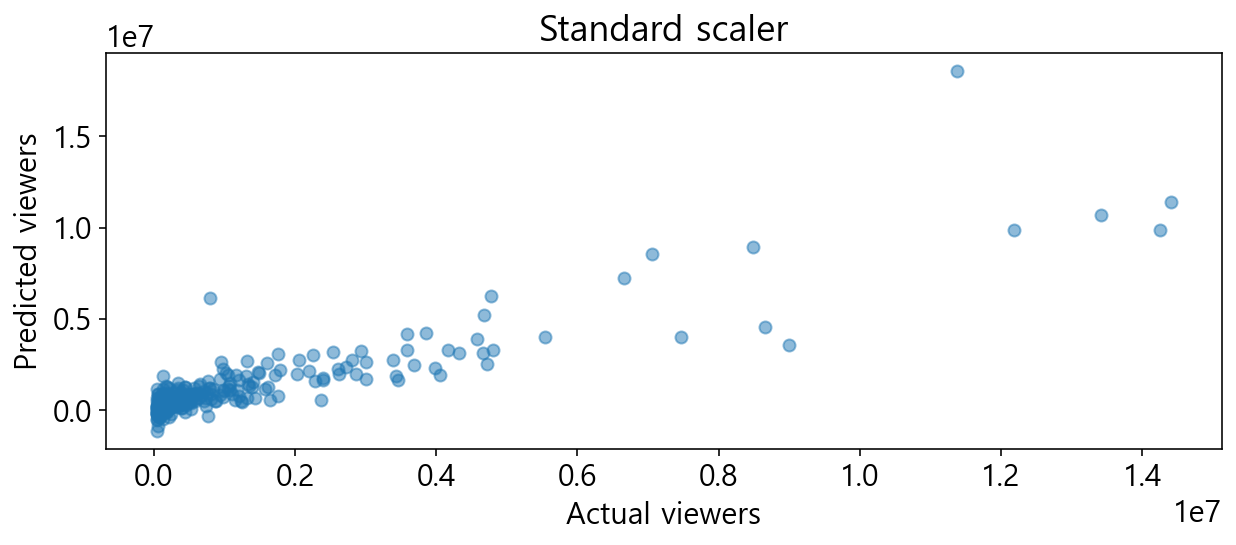

In [37]:
plt.figure(figsize=(10,8))
plt.rc('font', size=15)
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred_mm, alpha=0.5)
plt.title('MinMax scaler')
plt.xlabel('Actual viewers')
plt.ylabel('Predicted viewers')
plt.show()

plt.figure(figsize=(10,8))
plt.rc('font', size=15)
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred_std, alpha=0.5)
plt.title('Standard scaler')
plt.xlabel('Actual viewers')
plt.ylabel('Predicted viewers')
plt.show()

모델간 차이가 없음을 알 수 있음

### K-fold cross validation

In [38]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score

In [58]:
scores_kf = cross_val_score(model_std, X_oh, y, cv=KFold(n_splits=5), scoring='r2')
print(scores_kf)
print(scores_kf.mean())

[0.43629983 0.56594938 0.73552837 0.84142861 0.69128231]
0.6540977008124631


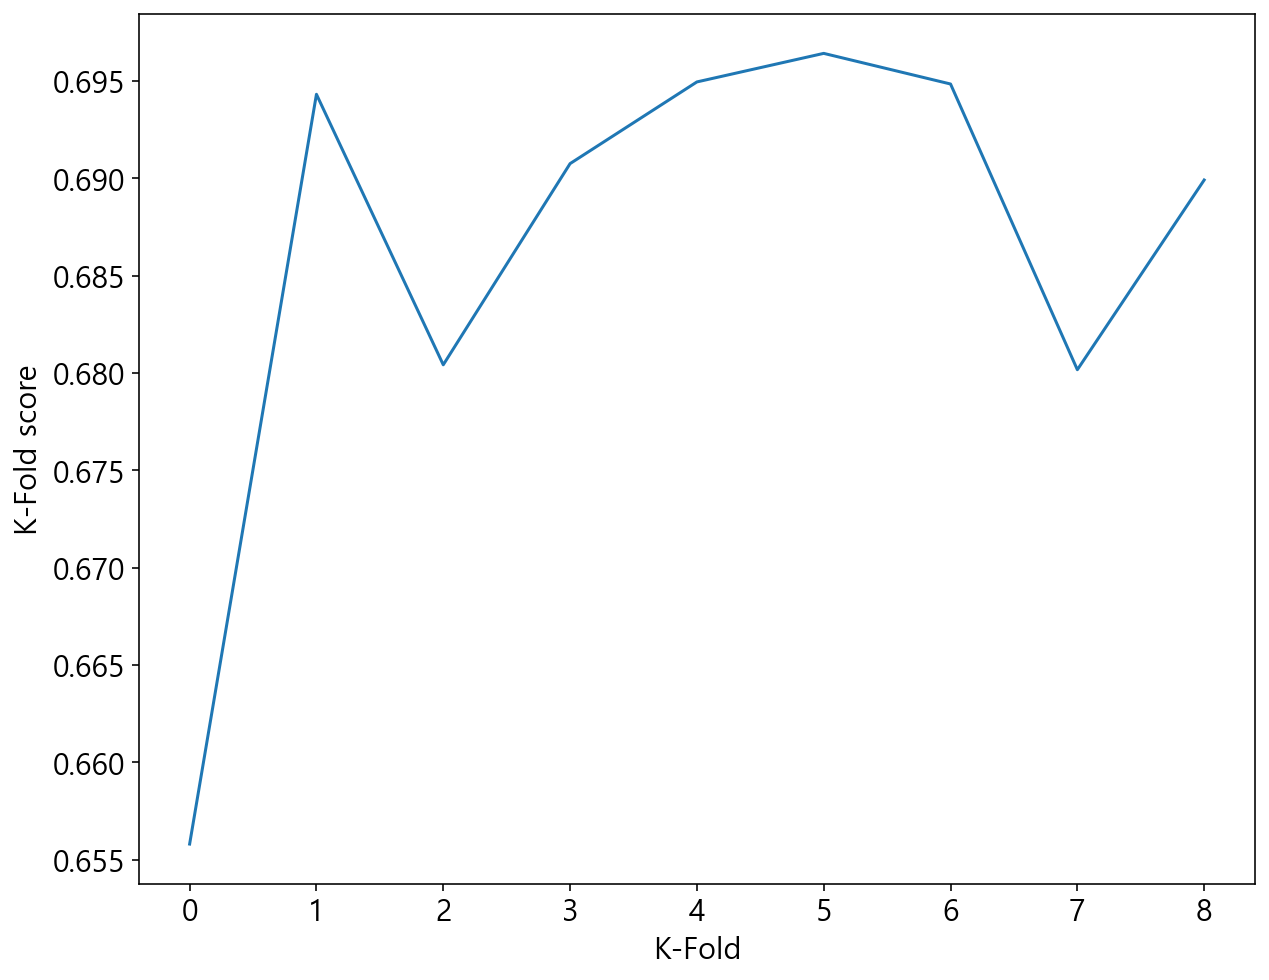

In [60]:
kf_scores = []
for i in range(2,11):
    score = (cross_val_score(model_std, X_be, y, cv=KFold(n_splits=i), scoring='r2'))
    kf_scores.append(score.mean())
    
plt.rc('font', size=15)
plt.figure(figsize=(10, 8))
plt.plot(kf_scores)
plt.xlabel('K-Fold')
plt.ylabel('K-Fold score')
plt.show()

### regularized regression

In [41]:
from sklearn.linear_model import ElasticNet, Ridge, Lasso

score_ridge = []
score_lasso = []
score_elnet = []
alphas = [10, 1, 0.1, 0.01, 0.001, 0.0001]

for a in alphas:
    ridge = Ridge(alpha=a, max_iter=1000)
    ridge.fit(X_train_be, y_train)
    score_ridge.append([a, ridge.score(X_test_be, y_test)])
    
    lasso = Lasso(alpha=a, max_iter=1000)
    lasso.fit(X_train_be, y_train)
    score_lasso.append([a, lasso.score(X_test_be, y_test)])
    
    elnet = ElasticNet(alpha=a, l1_ratio=0.2, max_iter=1000)
    elnet.fit(X_train_be, y_train)
    score_elnet.append([a, elnet.score(X_test_be, y_test)])
    
score_elnet = pd.DataFrame(score_elnet)
score_elnet = score_elnet.rename(columns={0:'alpha', 1:'ElasticNet'})
score_lasso = pd.DataFrame(score_lasso)
score_lasso = score_lasso.rename(columns={0:'alpha', 1:'Lasso'})
score_ridge = pd.DataFrame(score_ridge)
score_ridge = score_ridge.rename(columns={0:'alpha', 1:'Ridge'})

score_tot = pd.merge(score_elnet, score_lasso, on='alpha', how='outer')
score_tot = pd.merge(score_tot, score_ridge, on='alpha', how='outer')
score_tot

,alpha,ElasticNet,Lasso,Ridge
0,10.0000,0.782999,0.795965,0.797238
1,1.0000,0.791728,0.795955,0.796140
2,0.1000,0.798962,0.795954,0.795974
3,0.0100,0.797146,0.795954,0.795956
4,0.0010,0.796122,0.795954,0.795954
5,0.0001,0.795972,0.795954,0.795954


Text(0, 0.5, 'score')

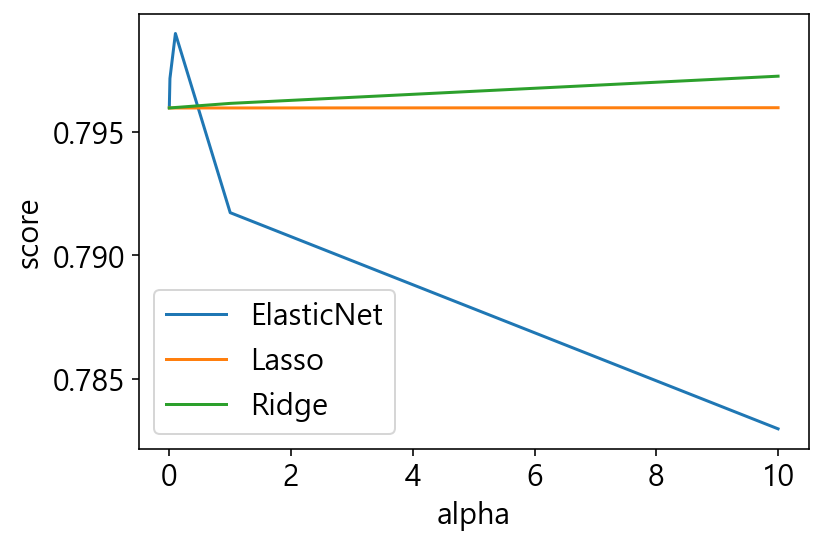

In [42]:
plt.plot(score_tot.alpha, score_tot.ElasticNet)
plt.plot(score_tot.alpha, score_tot.Lasso)
plt.plot(score_tot.alpha, score_tot.Ridge)
plt.legend(['ElasticNet', 'Lasso', 'Ridge'])
plt.xlabel('alpha')
plt.ylabel('score')

In [43]:
x = [model_be.score(X_test_be, y_test), scores_kf.mean(), max(score_elnet.ElasticNet)]

df_scores = pd.DataFrame(x)
df_scores = df_scores.rename(index={0:'Linear Regression', 1:'K-Fold', 2:'ElasticNet'})
df_scores = df_scores.rename(columns={0:'score'})
df_scores

,score
Linear Regression,0.795954
K-Fold,0.654098
ElasticNet,0.798962


<BarContainer object of 3 artists>

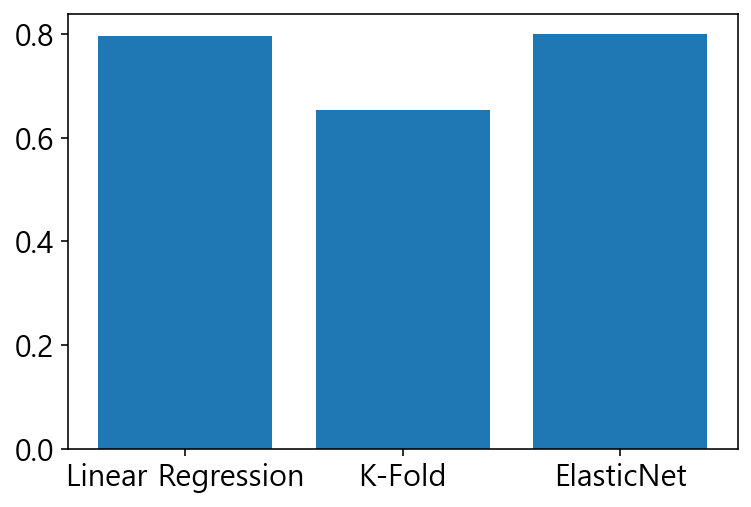

In [44]:
plt.bar(df_scores.index, df_scores.score)